In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import psycopg2

In [2]:
import psycopg2

In [3]:
from scipy.stats import chi2_contingency
#thought I was going to do chi square, but t-test was more fitting

In [4]:
conn = psycopg2.connect(database = "targetdata", 
                        user = "postgres", 
                        host= 'localhost',
                        password = "Danny@2024",
                        port = 5432)

In [5]:
cursor = conn.cursor()


In [6]:
# my password contained @ (Danny@2024) and so sqlalchemy uses %40 as a placeholde for @ 
from sqlalchemy import create_engine

engine = create_engine('postgresql+psycopg2://postgres:Danny%402024\
@localhost/targetdata')


In [7]:
# this is the method of how I implemented my SQL query result into a dataframe
# regg (Help with video)
query5 = "SELECT product_category_name, ROUND(AVG(order_reviews.review_score),2) as avg_rev_score, ROUND(AVG(order_delivered_customer_date::date - order_purchase_timestamp::date),2) AS avg_delivery_days FROM orders inner join order_reviews on orders.order_id = order_reviews.order_id inner join order_items on order_items.order_id = orders.order_id inner join products on products.product_id = order_items.product_id where product_category_name is not null group by product_category_name"

df5 = pd.read_sql(query5, engine)


In [8]:
print(df5)

        product_category_name  avg_rev_score  avg_delivery_days
0   Agro Industria e Comercio           4.00              11.58
1                         Art           3.94              11.21
2             Arts and Crafts           4.13               5.67
3                       audio           3.83              13.27
4                  automotive           4.07              12.10
..                        ...            ...                ...
68           stationary store           4.19              12.66
69            technical books           4.37              10.58
70                  telephony           3.95              12.80
71                       toys           4.16              11.56
72            Watches present           4.02              12.54

[73 rows x 3 columns]


In [9]:
from scipy.stats import shapiro

# Example data
data = df5['avg_rev_score']

# Perform Shapiro-Wilk test
stat, p_value = shapiro(data)
print(f"Shapiro-Wilk Test Statistic: {stat}, P-Value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Data appears to be normally distributed (fail to reject H0).")
else:
    print("Data does not appear to be normally distributed (reject H0).")


Shapiro-Wilk Test Statistic: 0.8537458181381226, P-Value: 5.738527306675678e-07
Data does not appear to be normally distributed (reject H0).


In [10]:
from scipy.stats import levene

# Example data
group1 = df5['avg_rev_score']
group2 = df5['avg_delivery_days']

# Perform Levene's test
stat, p_value = levene(group1, group2)
print(f"Levene's Test Statistic: {stat}, P-Value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("Variances are equal (fail to reject H0).")
else:
    print("Variances are not equal (reject H0).")


Levene's Test Statistic: 52.576358998431544, P-Value: 2.3357199821923776e-11
Variances are not equal (reject H0).


In [11]:
from scipy.stats import ttest_ind

# since data is not normally distributed I have to use independent t-test
# Example: Compare two independent groups
group1 = df5['avg_rev_score']
group2 = df5['avg_delivery_days']

t_stat, p_value = ttest_ind(group1, group2)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -31.610009288381164, P-Value: 1.1703403943839411e-66


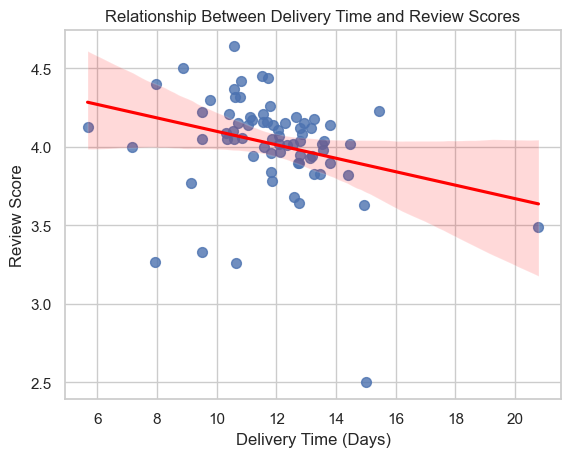

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example Data
delivery_time = df5['avg_delivery_days']
review_score = df5['avg_rev_score']

# Scatter plot with a trend line
sns.set(style="whitegrid")
sns.regplot(x=delivery_time, y=review_score, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title("Relationship Between Delivery Time and Review Scores")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Review Score")
plt.show()


In [13]:
# Trend line slopes downward resulting in longer delivery times are associated with lower review scores

In [14]:
#disregard
query6 = "select product_category_name, payment_type from products inner join order_items on products.product_id = order_items.product_id inner join orders on orders.order_id = order_items.order_id inner join payments on payments.order_id = orders.order_id where product_category_name is not null"
df6 = pd.read_sql(query6, engine)

In [17]:
query7 = "select product_category_name, customers.customer_id from products inner join order_items on products.product_id = order_items.product_id inner join orders on orders.order_id = order_items.order_id inner join customers on customers.customer_id = orders.customer_id"
df7 = pd.read_sql(query7, engine)

In [18]:
print(df7)

       product_category_name                       customer_id
0                   pet Shop  f6dd3ec061db4e3987629fe6b26e5cce
1       Furniture Decoration  6489ae5e4333f3693df5ad4372dab6d3
2               Garden tools  58dbd0b2d70206bf40e62cd34e84d795
3                 housewares  816cbea969fe5b689b39cfc97a506742
4                  telephony  32e2e6ab09e778d99bf2e0ecd4898718
...                      ...                               ...
112645         sport leisure  a5201e1a6d71a8d21e869151bd5b4085
112646        bed table bath  ca8374c00203cec663bc1eabf0aaede4
112647            housewares  b51593916b4b8e0d6f66f2ae24f2673d
112648  computer accessories  84c5d4fbaf120aae381fad077416eaa0
112649  computer accessories  b5e6afd5a41800fdf401e0272ca74655

[112650 rows x 2 columns]


In [19]:
import pandas as pd


# Frequency distribution of products sold
product_frequency = df7['product_category_name'].value_counts()

print("Frequency Distribution of Products Sold:")
print(product_frequency)


Frequency Distribution of Products Sold:
bed table bath                 11115
HEALTH BEAUTY                   9670
sport leisure                   8641
Furniture Decoration            8334
computer accessories            7827
                               ...  
cds music dvds                    14
La Cuisine                        14
PC Gamer                           9
Fashion Children's Clothing        8
insurance and services             2
Name: product_category_name, Length: 73, dtype: int64


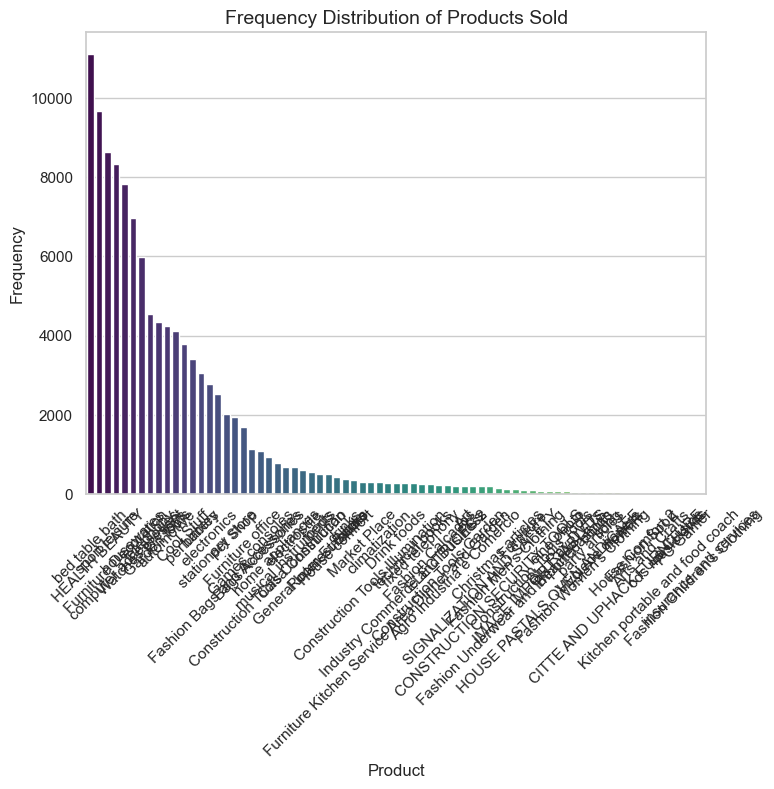

In [20]:
import seaborn as sns

# I realized that this could be done in SQL and Power BI, so I decided not to use both frequency tables



# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=product_frequency.index, y=product_frequency.values, palette="viridis")
plt.title('Frequency Distribution of Products Sold', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [21]:
# Frequency of customers served (unique customer count per product)
customers_per_product = df7.groupby('product_category_name')['customer_id'].nunique()

print("\nFrequency of Customers Served per Product:")
print(customers_per_product)



Frequency of Customers Served per Product:
product_category_name
Agro Industria e Comercio     182
Art                           202
Arts and Crafts                23
Bags Accessories             1034
Blu Ray DVDs                   59
                             ... 
sport leisure                7720
stationary store             2311
technical books               260
telephony                    4199
toys                         3886
Name: customer_id, Length: 73, dtype: int64


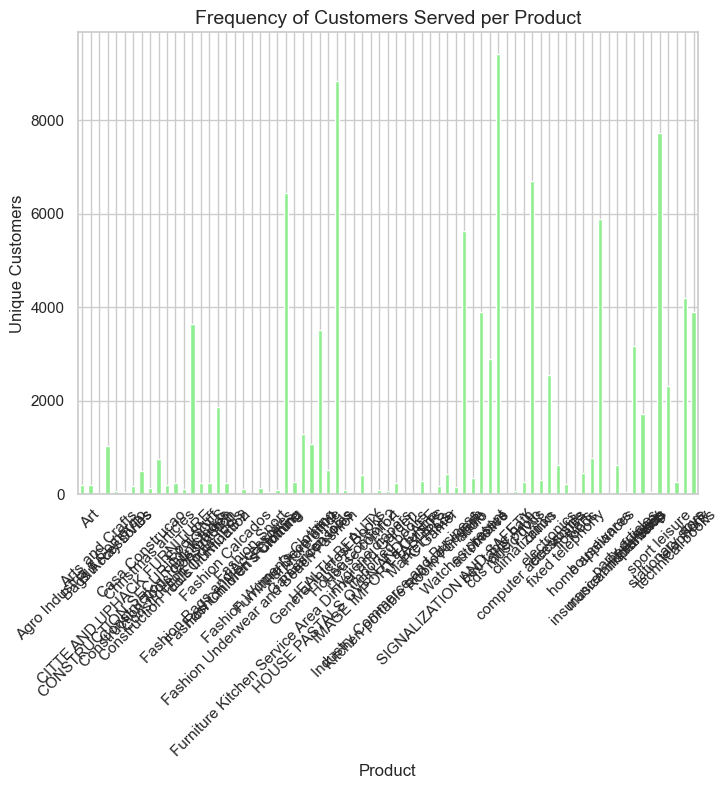

In [22]:

# I decided not to use this 
# Plotting
plt.figure(figsize=(8, 6))
customers_per_product.plot(kind='bar', color='lightgreen')
plt.title('Frequency of Customers Served per Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unique Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [23]:
#correv (help with video)

query8 = "select COUNT(products.product_id) as sales_volume, review_score from products inner join order_items on products.product_id = order_items.product_id inner join orders on orders.order_id = order_items.order_id inner join order_reviews on order_reviews.order_id = orders.order_id group by review_score"
df8 = pd.read_sql(query8, engine)

In [24]:
print(df8)

   sales_volume  review_score
0         14235             1
1          3874             2
2          9423             3
3         21315             4
4         63525             5


Pearson Correlation: 0.77
Spearman Correlation: 0.70


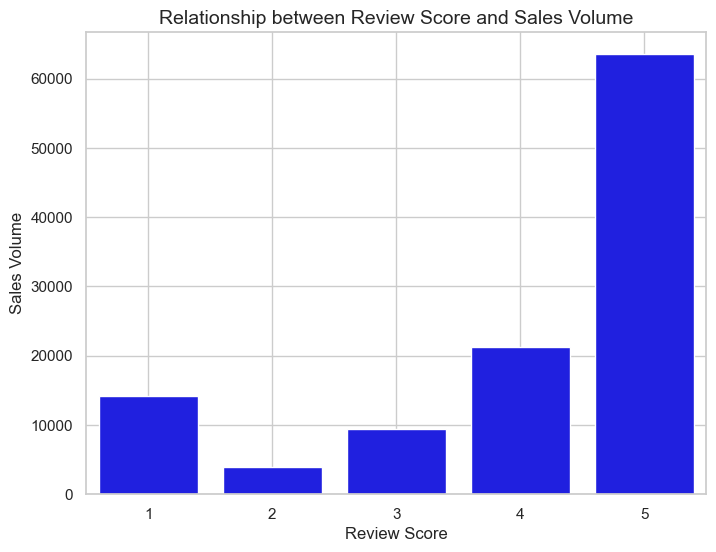

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




# Pearson Correlation
pearson_corr = df8['review_score'].corr(df8['sales_volume'], method='pearson')
print(f"Pearson Correlation: {pearson_corr:.2f}")

# Spearman Correlation
spearman_corr = df8['review_score'].corr(df8['sales_volume'], method='spearman')
print(f"Spearman Correlation: {spearman_corr:.2f}")

# Scatterplot
plt.figure(figsize=(8, 6))
sns.barplot(x='review_score', y='sales_volume', data=df8, color='blue')
#sns.lineplot(x='review_score', y='sales_volume', data=df8, color='red',)
plt.title('Relationship between Review Score and Sales Volume', fontsize=14)
plt.xlabel('Review Score', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.grid(True)
plt.show()


In [26]:
#A Pearson correlation of 0.77 and a Spearman correlation of 0.70 indicates a strong positive relationship between the two variables

In [27]:
query9 = "SELECT products.product_category_name, SUM(payment_value) AS total_revenue, ROUND(AVG(payment_value),2) AS average_revenue, COUNT(orders.order_id) as total_sales FROM payments INNER JOIN orders ON orders.order_id = payments.order_id INNER JOIN order_items ON order_items.order_id = orders.order_id INNER JOIN products on products.product_id = order_items.product_id GROUP BY  products.product_category_name ORDER BY  total_revenue DESC, total_sales DESC;"
df9 = pd.read_sql(query9, engine)

In [28]:
print(df9)

          product_category_name  total_revenue  average_revenue  total_sales
0                bed table bath     1712553.67           144.85        11823
1                 HEALTH BEAUTY     1657373.12           166.20         9972
2          computer accessories     1585330.45           196.16         8082
3          Furniture Decoration     1430176.39           163.56         8744
4               Watches present     1429216.68           230.48         6201
..                          ...            ...              ...          ...
69                     PC Gamer        2174.43           217.44           10
70              House Comfort 2        1710.54            55.18           31
71               cds music dvds        1199.43            85.67           14
72  Fashion Children's Clothing         785.67            98.21            8
73       insurance and services         324.51           162.26            2

[74 rows x 4 columns]


In [29]:
import pandas as pd
from scipy.stats import pearsonr

'''
Please ignore all correlation matrices and graphs
total_sales in df9 actually means I used COUNT() function in SQL
average_revenue = total_revenue / total_sales
I realized that I could do this in SQL and graph it in PowerBI
It also doesn't make sense that average revenue could be correlated with total revenue because average
revenue uses total revenue in its equation 

'''



# Calculate the correlation between average_order_size and total_revenue
corr, _ = pearsonr(df9['average_revenue'], df9['total_revenue'])
print(f"Correlation between average order size and total revenue: {corr}")


Correlation between average order size and total revenue: 0.003474107751031826


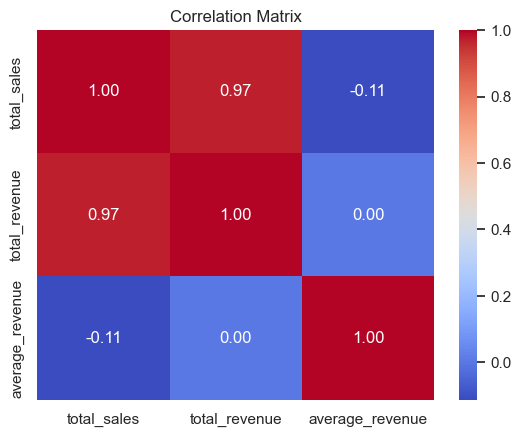

In [30]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df9[['total_sales', 'total_revenue', 'average_revenue']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

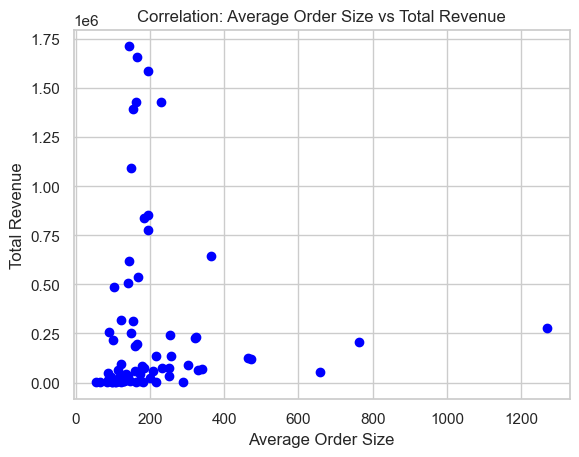

In [31]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df9['average_revenue'], df9['total_revenue'], color='blue')
plt.title('Correlation: Average Order Size vs Total Revenue')
plt.xlabel('Average Order Size')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


In [32]:
# find (help with video)


query10 = "select (order_delivered_customer_date::date - order_purchase_timestamp::date) as delivery_days, product_weight_g from orders INNER JOIN order_items ON order_items.order_id = orders.order_id INNER JOIN products on products.product_id = order_items.product_id"
df10 = pd.read_sql(query10, engine)

In [33]:
print(df10)

        delivery_days  product_weight_g
0                16.0           30000.0
1                 8.0            3050.0
2                25.0            3750.0
3                 7.0             450.0
4                 8.0             200.0
...               ...               ...
112645           21.0            2700.0
112646           17.0             200.0
112647           17.0           10150.0
112648            9.0            8950.0
112649            2.0             100.0

[112650 rows x 2 columns]


In [34]:
df10 = df10.dropna()

In [35]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df10['product_weight_g'], df10['delivery_days'])
print(f"Correlation between average order size and total revenue: {corr}")

Correlation between average order size and total revenue: 0.0861241827614801


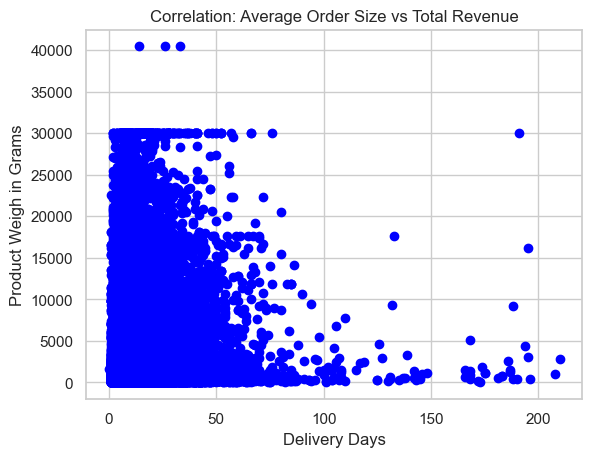

In [36]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter( df10['delivery_days'], df10['product_weight_g'], color='blue')
plt.title('Correlation: Average Order Size vs Total Revenue')
plt.xlabel('Delivery Days')
plt.ylabel('Product Weigh in Grams')
plt.grid(True)
plt.show()

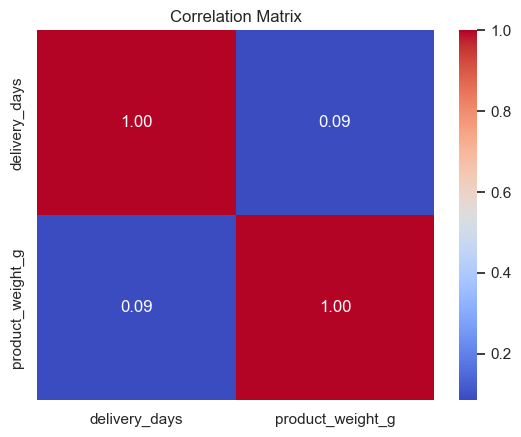

In [37]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = df10[['delivery_days', 'product_weight_g']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [38]:
print(df10)

        delivery_days  product_weight_g
0                16.0           30000.0
1                 8.0            3050.0
2                25.0            3750.0
3                 7.0             450.0
4                 8.0             200.0
...               ...               ...
112645           21.0            2700.0
112646           17.0             200.0
112647           17.0           10150.0
112648            9.0            8950.0
112649            2.0             100.0

[110178 rows x 2 columns]


In [39]:
# find2 (help with video)

import pandas as pd
from scipy.stats import spearmanr

# Calculate Spearman's rank correlation
corr, p_val = spearmanr(df10['product_weight_g'], df10['delivery_days'])

# Print the result
print(f"Spearman's rank correlation: {corr}")
print(f"P-value: {p_val}")

# Interpretation
if p_val < 0.05:
    print("There is a significant monotonic relationship.")
else:
    print("There is no significant monotonic relationship.")


Spearman's rank correlation: 0.10127010208330652
P-value: 5.599855286526612e-249
There is a significant monotonic relationship.


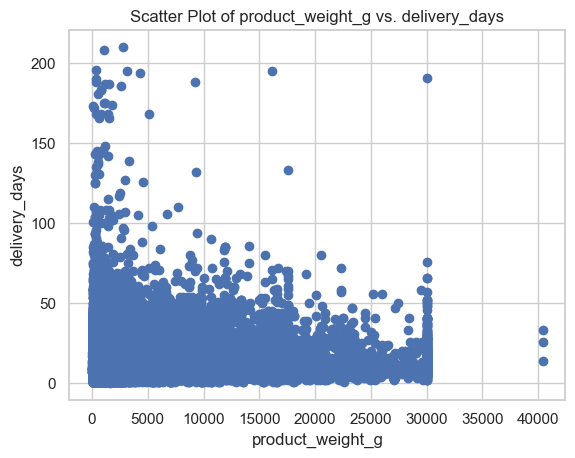

In [50]:
import matplotlib.pyplot as plt

plt.scatter(df10['product_weight_g'], df10['delivery_days'])
plt.title("Scatter Plot of product_weight_g vs. delivery_days")
plt.xlabel("product_weight_g")
plt.ylabel("delivery_days")
plt.show()

# non-linear relationship have to use independent t-test
# Prodcut Weight data was too muddy, so I decided to split data into heavy and light categories

In [41]:
import pandas as pd
from scipy.stats import ttest_ind

# Decided to seperate light and heavy products to see if there is a difference

# Create two groups: heavy and light products based on median weight
median_weight = df10['product_weight_g'].median()

# Group 1: Heavier products
heavy_products = df10[df10['product_weight_g'] > median_weight]

# Group 2: Lighter products
light_products = df10[df10['product_weight_g'] <= median_weight]

# Perform t-test on delivery times between the two groups
t_stat, p_val = ttest_ind(heavy_products['delivery_days'], light_products['delivery_days'], equal_var=False)

# Output the result
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

# Interpret the p-value
if p_val < 0.05:
    print("There is a significant difference in delivery times between heavy and light products.")
else:
    print("There is no significant difference in delivery times between heavy and light products.")


T-statistic: 22.906477027795916
P-value: 7.604603499692822e-116
There is a significant difference in delivery times between heavy and light products.


In [42]:
print(median_weight)

700.0


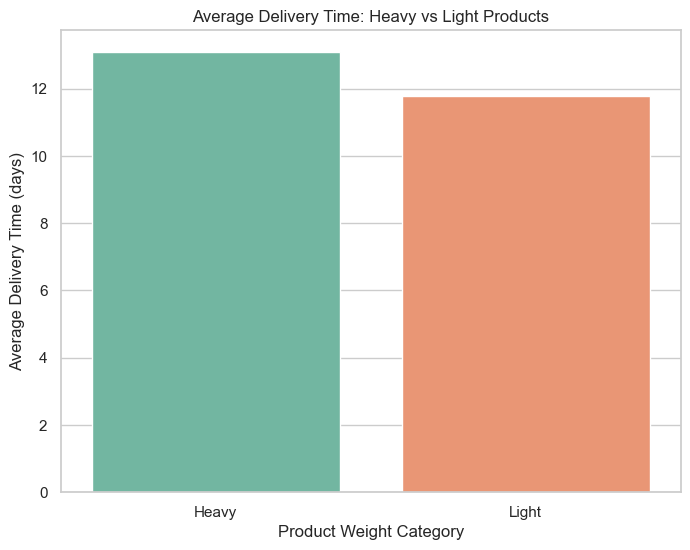

In [43]:
plt.figure(figsize=(8, 6))

# Create a new column to label products as 'Heavy' or 'Light' based on weight
df10['product_weight_category'] = ['Heavy' if weight > median_weight else 'Light' for weight in df10['product_weight_g']]

# Calculate mean delivery times for heavy and light products
mean_delivery_time = df10.groupby('product_weight_category')['delivery_days'].mean()

# Bar plot
sns.barplot(x=mean_delivery_time.index, y=mean_delivery_time.values, palette='Set2')
plt.title('Average Delivery Time: Heavy vs Light Products')
plt.xlabel('Product Weight Category')
plt.ylabel('Average Delivery Time (days)')
plt.show()


In [44]:
print(df10)

        delivery_days  product_weight_g product_weight_category
0                16.0           30000.0                   Heavy
1                 8.0            3050.0                   Heavy
2                25.0            3750.0                   Heavy
3                 7.0             450.0                   Light
4                 8.0             200.0                   Light
...               ...               ...                     ...
112645           21.0            2700.0                   Heavy
112646           17.0             200.0                   Light
112647           17.0           10150.0                   Heavy
112648            9.0            8950.0                   Heavy
112649            2.0             100.0                   Light

[110178 rows x 3 columns]


In [45]:
import pandas as pd
import numpy as np

df10.index = np.arange(1, len(df10) + 1)

In [46]:
print(df10)

        delivery_days  product_weight_g product_weight_category
1                16.0           30000.0                   Heavy
2                 8.0            3050.0                   Heavy
3                25.0            3750.0                   Heavy
4                 7.0             450.0                   Light
5                 8.0             200.0                   Light
...               ...               ...                     ...
110174           21.0            2700.0                   Heavy
110175           17.0             200.0                   Light
110176           17.0           10150.0                   Heavy
110177            9.0            8950.0                   Heavy
110178            2.0             100.0                   Light

[110178 rows x 3 columns]


In [47]:
#add index because Power BI trims duplicate rows
df10['index1'] = df10.index

In [48]:
print(df10)

        delivery_days  product_weight_g product_weight_category  index1
1                16.0           30000.0                   Heavy       1
2                 8.0            3050.0                   Heavy       2
3                25.0            3750.0                   Heavy       3
4                 7.0             450.0                   Light       4
5                 8.0             200.0                   Light       5
...               ...               ...                     ...     ...
110174           21.0            2700.0                   Heavy  110174
110175           17.0             200.0                   Light  110175
110176           17.0           10150.0                   Heavy  110176
110177            9.0            8950.0                   Heavy  110177
110178            2.0             100.0                   Light  110178

[110178 rows x 4 columns]
